In [17]:
from models import RNNModel
import numpy as np
import pandas as pd
import joblib
from data import readLocally
from sklearn.metrics import confusion_matrix
from visualization import plot_roc_auc, pr_curve, format_vertical_headers, print_confusion_matrix, printModelData


data = pd.read_csv("creditcard_ULB.csv")

In [18]:
X = data.iloc[:, 0:-2]
y = data.iloc[:,-1]

X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [20]:
X = X.values
y = y.values

print(X.shape, y.shape)

(284807, 29) (284807,)


In [21]:
X = X.reshape( X.shape[0], 1, X.shape[1] )
X.shape

(284807, 1, 29)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1, stratify=y_train)


print("""
TRAIN {} {}
TEST  {} {}
VAL   {} {}
""".format(
X_train.shape, y_train.shape,
X_test.shape,  y_test.shape,
X_val.shape, y_val.shape
))


TRAIN (182276, 1, 29) (182276,)
TEST  (56962, 1, 29) (56962,)
VAL   (45569, 1, 29) (45569,)



In [23]:
print("""
TRAIN 
  P: {} {:.3f}%
  N: {} {:.3f}%
TEST  
  P: {} {:.3f}% 
  N: {} {:.3f}%
VAL   
  P: {} {:.3f}% 
  N: {} {:.3f}%
  
CLASES: {}
""".format(
len(y_train[y_train == 1]), len(y_train[y_train == 1])*100/len(y_train), len(y_train[y_train == 0]), len(y_train[y_train == 0])*100/len(y_train),
len(y_test[y_test == 1]), len(y_test[y_test == 1])*100/len(y_test),  len(y_test[y_test == 0]), len(y_test[y_test == 0])*100/len(y_test), 
len(y_val[y_val == 1]), len(y_val[y_val == 1])*100/len(y_val) , len(y_val[y_val == 0]), len(y_val[y_val == 0])*100/len(y_val),
np.unique(y)
))



TRAIN 
  P: 315 0.173%
  N: 181961 99.827%
TEST  
  P: 98 0.172% 
  N: 56864 99.828%
VAL   
  P: 79 0.173% 
  N: 45490 99.827%
  
CLASES: [0 1]



In [32]:
n_batches        = X_train.shape[0]
batch_size       = X_train.shape[1]
n_features       = X_train.shape[2]

print(n_batches, batch_size, n_features)

182276 1 29


In [51]:
gru_param_grid = {
    'modelType': ['GRU'], 
    'dropout': [False],
    'dropout_rate': [0.2], 
    'epochs': [25], 
    'hidden_layer_activation': ['sigmoid'], 
    'hidden_layers': [0], 
    'hidden_layers_neurons': [12], 
    'loss': ['binary_crossentropy'], 
    'optimizer': ['adam'], 
    'output_layer_activation': ['sigmoid'], 
    'rnn_hidden_layers': [0], 
    'rnn_hidden_layers_neurons': [29], 
    'rnn_layer_activation': ['sigmoid']
}

In [52]:
gru_model_1 = RNNModel(
  input_shape=( batch_size , n_features  ),
  output_dim = 1,
  param_grid=gru_param_grid,
  scoring=[
    'accuracy', 'precision', 'recall', 
#     'roc_auc', 
    'f1', 'average_precision' ],  
  refit= "recall",   
  verbose=1,
  output_file= "gru_ULB_checkpoints.h5",
  early_stopping_monitor="val_recall",
  model_checkpoint_monitor="val_recall"
)



_ _ _ _ _ _ _ _ _ _  CREATING RNN MODEL WITHOUT L1 REGULARIZATION _ _ _ _ _ _ _ _ _ _ 




_ _ _ _ _ _ _ _ _ _  INITIALIZING GRID SEARCH RNN MODEL _ _ _ _ _ _ _ _ _ _ 



        PARAMETERS:
        ________________________________
        input_shape :  (1, 29)
        output_dim  :  1
        main scoring:  recall
        all scoring :  ['accuracy', 'precision', 'recall', 'f1', 'average_precision']
        early_stopping_monitor   : val_recall
        model_checkpoint_monitor : val_recall
        verbose: 1
        callbacks: 

[<tensorflow.python.keras.callbacks.EarlyStopping object at 0x7f1ea5c1a710>, <tensorflow.python.keras.callbacks.ModelCheckpoint object at 0x7f1ea5c1aeb8>, <tensorflow.python.keras.callbacks.CSVLogger object at 0x7f1ea5c1a208>, <tensorflow.python.keras.callbacks.TensorBoard object at 0x7f1ea5c1a0f0>, <tensorflow.python.keras.callbacks.ProgbarLogger object at 0x7f1ea5c1a160>]


        
modelType : ['GRU']
dropout : [False]
dropout_rate : [0.2]
epochs : [25]
h

In [53]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train.flatten()), y_train.flatten())
modified_weights = np.array(class_weights) 
# modified_weights[0] = class_weights[0] / 4
# modified_weights[1] = class_weights[1] * 4
print("Original Wieghts {}\nModified Weights: {}".format( dict(enumerate(class_weights)), dict(enumerate(modified_weights)) ))


from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

X_train_2D = X_train.reshape(X_train.shape[0], X_train.shape[2])
print('Original dataset shape X {} => {}, y {}'.format( X_train.shape, X_train_2D.shape, y_train.shape ))
print('P {} N {}'.format( len(y_train[y_train == 1]), len(y_train[y_train == 0]) ))
sm = SMOTE(random_state=42)
X_train_ov_2D, y_train_ov = sm.fit_resample(X_train_2D, y_train)
X_train_ov = X_train_ov_2D.reshape(X_train_ov_2D.shape[0], 1, X_train_ov_2D.shape[1])

print('Resampled dataset shape ',X_train_ov.shape,  X_train_ov_2D.shape, y_train_ov.shape, )
print('P {} N {}'.format( len(y_train_ov[y_train_ov == 1]), len(y_train_ov[y_train_ov == 0]) ))


Original Wieghts {0: 0.5008655700946906, 1: 289.32698412698414}
Modified Weights: {0: 0.5008655700946906, 1: 289.32698412698414}
Original dataset shape X (182276, 1, 29) => (182276, 29), y (182276,)
P 315 N 181961
Resampled dataset shape  (363922, 1, 29) (363922, 29) (363922,)
P 181961 N 181961


In [54]:
# gru_history_1 = gru_model_1.train( X_train, y_train, X_test, y_test, class_weights=modified_weights )
gru_history_1 = gru_model_1.train( X_train_ov, y_train_ov , X_test, y_test, class_weights=modified_weights )
gru_model_1.model.best_estimator_.model.save( "gru_ULB.h5" )



_ _ _ _ _ _ _ _ _ _  TRAINING RNN _ _ _ _ _ _ _ _ _ _ 


Using Given Class Weights. [  0.50086557 289.32698413]

        Class weights: 
[  0.50086557 289.32698413]
{0: 0.5008655700946906, 1: 289.32698412698414}

        for classes: 
[0 1]

        # Frauds: 181961
        # of Non-Frauds: 181961
        
INPUTS
        X:      (363922, 1, 29)
        y:      (363922,)
        X_test: (56962, 1, 29)
        y_test: (56962,)
        
Fitting 10 folds for each of 1 candidates, totalling 10 fits


_ _ _ _ _ _ _ _ _ _  CREATING ML MODEL _ _ _ _ _ _ _ _ _ _ 



        PARAMETERS:
        ________________________________ 
          rnn_hidden_layers:         0 
          rnn_hidden_layers_neurons: 29 
          hidden_layers:             0 
          hidden_layers_neurons:     12
          loss:                      binary_crossentropy
          optimizer:                 adam
          modelType:                 GRU
          dropout:                   False
          dropout_rate:     

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_22 (GRU)                 (None, 29)                5220      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 30        
_________________________________________________________________
activation_22 (Activation)   (None, 1)                 0         
Total params: 5,250
Trainable params: 5,250
Non-trainable params: 0
_________________________________________________________________


MODEL SUMMARY: 

 None
Train on 327529 samples, validate on 56962 samples
Epoch 1/25
Epoch 1/25
327520/327529 [============================>.] - ETA: 0s - loss: 0.6901 - tp: 172891.0000 - fp: 138200.0000 - tn: 7425.0000 - fn: 9004.0000 - accuracy: 0.5505 - precision: 0.5558 - recall: 0.9505 - auc: 0.5013
Epoch 00001: val_recall improved from inf to 1.00000, saving model to gru

/home/ec2-user/anaconda3/envs/verafin-mitacs-2020/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


327530/327530 [==============================] - 7s 21us/sample


_ _ _ _ _ _ _ _ _ _  CREATING ML MODEL _ _ _ _ _ _ _ _ _ _ 



        PARAMETERS:
        ________________________________ 
          rnn_hidden_layers:         0 
          rnn_hidden_layers_neurons: 29 
          hidden_layers:             0 
          hidden_layers_neurons:     12
          loss:                      binary_crossentropy
          optimizer:                 adam
          modelType:                 GRU
          dropout:                   False
          dropout_rate:              0.2
          input_shape:               (1, 29)
          output_dim:                1
          output_layer_activation:   sigmoid
          rnn_layer_activation:      sigmoid
          hidden_layer_activation:   sigmoid
          keras_eval_metric:         [[<tensorflow.python.keras.metrics.TruePositives object at 0x7f1eac33e940>, <tensorflow.python.keras.metrics.FalsePositives object at 0x7f1ead31d4e0>, <tensorflow.pytho

/home/ec2-user/anaconda3/envs/verafin-mitacs-2020/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


327530/327530 [==============================] - 7s 20us/sample


_ _ _ _ _ _ _ _ _ _  CREATING ML MODEL _ _ _ _ _ _ _ _ _ _ 



        PARAMETERS:
        ________________________________ 
          rnn_hidden_layers:         0 
          rnn_hidden_layers_neurons: 29 
          hidden_layers:             0 
          hidden_layers_neurons:     12
          loss:                      binary_crossentropy
          optimizer:                 adam
          modelType:                 GRU
          dropout:                   False
          dropout_rate:              0.2
          input_shape:               (1, 29)
          output_dim:                1
          output_layer_activation:   sigmoid
          rnn_layer_activation:      sigmoid
          hidden_layer_activation:   sigmoid
          keras_eval_metric:         [[<tensorflow.python.keras.metrics.TruePositives object at 0x7f1de848b978>, <tensorflow.python.keras.metrics.FalsePositives object at 0x7f1de84012b0>, <tensorflow.pytho

/home/ec2-user/anaconda3/envs/verafin-mitacs-2020/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    32/327530 [..............................] - ETA: 37s

/home/ec2-user/anaconda3/envs/verafin-mitacs-2020/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


327530/327530 [==============================] - 7s 21us/sample


_ _ _ _ _ _ _ _ _ _  CREATING ML MODEL _ _ _ _ _ _ _ _ _ _ 



        PARAMETERS:
        ________________________________ 
          rnn_hidden_layers:         0 
          rnn_hidden_layers_neurons: 29 
          hidden_layers:             0 
          hidden_layers_neurons:     12
          loss:                      binary_crossentropy
          optimizer:                 adam
          modelType:                 GRU
          dropout:                   False
          dropout_rate:              0.2
          input_shape:               (1, 29)
          output_dim:                1
          output_layer_activation:   sigmoid
          rnn_layer_activation:      sigmoid
          hidden_layer_activation:   sigmoid
          keras_eval_metric:         [[<tensorflow.python.keras.metrics.TruePositives object at 0x7f1e4c7375c0>, <tensorflow.python.keras.metrics.FalsePositives object at 0x7f1e4c7370b8>, <tensorflow.pytho

/home/ec2-user/anaconda3/envs/verafin-mitacs-2020/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


327530/327530 [==============================] - 7s 21us/sample


_ _ _ _ _ _ _ _ _ _  CREATING ML MODEL _ _ _ _ _ _ _ _ _ _ 



        PARAMETERS:
        ________________________________ 
          rnn_hidden_layers:         0 
          rnn_hidden_layers_neurons: 29 
          hidden_layers:             0 
          hidden_layers_neurons:     12
          loss:                      binary_crossentropy
          optimizer:                 adam
          modelType:                 GRU
          dropout:                   False
          dropout_rate:              0.2
          input_shape:               (1, 29)
          output_dim:                1
          output_layer_activation:   sigmoid
          rnn_layer_activation:      sigmoid
          hidden_layer_activation:   sigmoid
          keras_eval_metric:         [[<tensorflow.python.keras.metrics.TruePositives object at 0x7f1de8175128>, <tensorflow.python.keras.metrics.FalsePositives object at 0x7f1de8446a90>, <tensorflow.pytho

/home/ec2-user/anaconda3/envs/verafin-mitacs-2020/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    32/327530 [..............................] - ETA: 38s

/home/ec2-user/anaconda3/envs/verafin-mitacs-2020/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


327530/327530 [==============================] - 7s 21us/sample


_ _ _ _ _ _ _ _ _ _  CREATING ML MODEL _ _ _ _ _ _ _ _ _ _ 



        PARAMETERS:
        ________________________________ 
          rnn_hidden_layers:         0 
          rnn_hidden_layers_neurons: 29 
          hidden_layers:             0 
          hidden_layers_neurons:     12
          loss:                      binary_crossentropy
          optimizer:                 adam
          modelType:                 GRU
          dropout:                   False
          dropout_rate:              0.2
          input_shape:               (1, 29)
          output_dim:                1
          output_layer_activation:   sigmoid
          rnn_layer_activation:      sigmoid
          hidden_layer_activation:   sigmoid
          keras_eval_metric:         [[<tensorflow.python.keras.metrics.TruePositives object at 0x7f1e4c7371d0>, <tensorflow.python.keras.metrics.FalsePositives object at 0x7f1dc0541978>, <tensorflow.pytho

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 18.7min finished


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_32 (GRU)                 (None, 29)                5220      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 30        
_________________________________________________________________
activation_32 (Activation)   (None, 1)                 0         
Total params: 5,250
Trainable params: 5,250
Non-trainable params: 0
_________________________________________________________________


MODEL SUMMARY: 

 None
Train on 363922 samples, validate on 56962 samples
Epoch 1/25
Epoch 1/25
363808/363922 [============================>.] - ETA: 0s - loss: 0.6963 - tp: 84567.0000 - fp: 84408.0000 - tn: 97493.0000 - fn: 97340.0000 - accuracy: 0.5004 - precision: 0.5005 - recall: 0.4649 - auc: 0.4991
Epoch 00001: val_recall did not improve from 0.00000
363922/363922 [=====

In [62]:
from sklearn import metrics

y_pred_val = gru_model_1.model.predict_proba(X_val)

print("PRED: " , y_pred_val.shape)

fpr, tpr, thresholds          = metrics.roc_curve(y_val, y_pred_val[: , 1])
precision, recall, thresholds = metrics.precision_recall_curve(y_val, y_pred_val[: , 1])
tn, fp, fn, tp                = metrics.confusion_matrix(y_val, y_pred_val[:, 1].round()).ravel()
rc_auc                        = metrics.roc_auc_score(y_val, y_pred_val[: , 1])
average_precision_score       = metrics.average_precision_score(y_val, y_pred_val[: , 1])


print("tn, fp, fn, tp ",(tn, fp, fn, tp), " rc_auc ", rc_auc, " average_precision_score ", average_precision_score )



45569/45569 [==============================] - 1s 21us/sample
PRED:  (45569, 2)
tn, fp, fn, tp  (59, 45431, 0, 79)  rc_auc  0.5026928995383602  average_precision_score  0.0017430059129820846


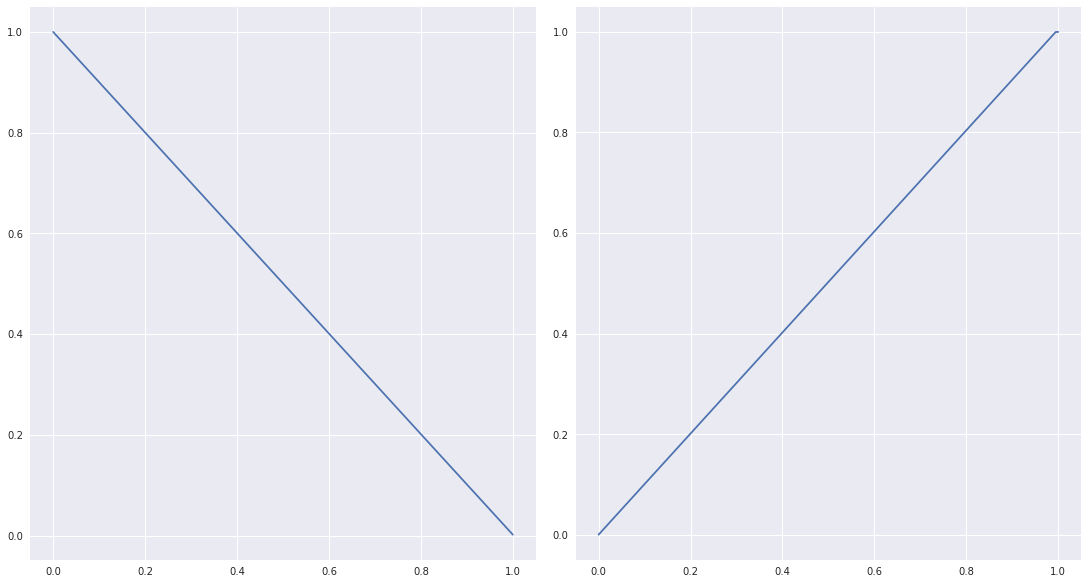

In [58]:
import matplotlib.pyplot as plt

fig, (ax1, ax2)=  plt.subplots(1, 2 , constrained_layout=True )
fig.set_size_inches(15, 8, forward=True)

ax1.plot(recall, precision, label="AUC-{:.3f}".format( 0 ) ) 
ax2.plot(fpr, tpr, label="AUC-{:.3f}".format(  0 ) )
            